## 7.6 对犯罪数据进行主成分分析

主成分分析是一种通过将为技术把多个变量化为少数几个主成分的统计分析方法，这些主成分能反应原始变量的绝大部分信息。本案例中的数据包含美国50个州的7种犯罪比率数据，分别是杀人罪、强奸罪、抢劫罪、伤害罪、夜盗罪、盗窃罪和汽车犯罪。显然地，这七种指标之间具有较高的信息重叠与相关性，因此我们使用主成分分析对数据进行降维能够有效简化实际问题的分析。

我们首先对变量进行相关性分析，这是对数据的探索性分析。


corrplot 0.92 loaded



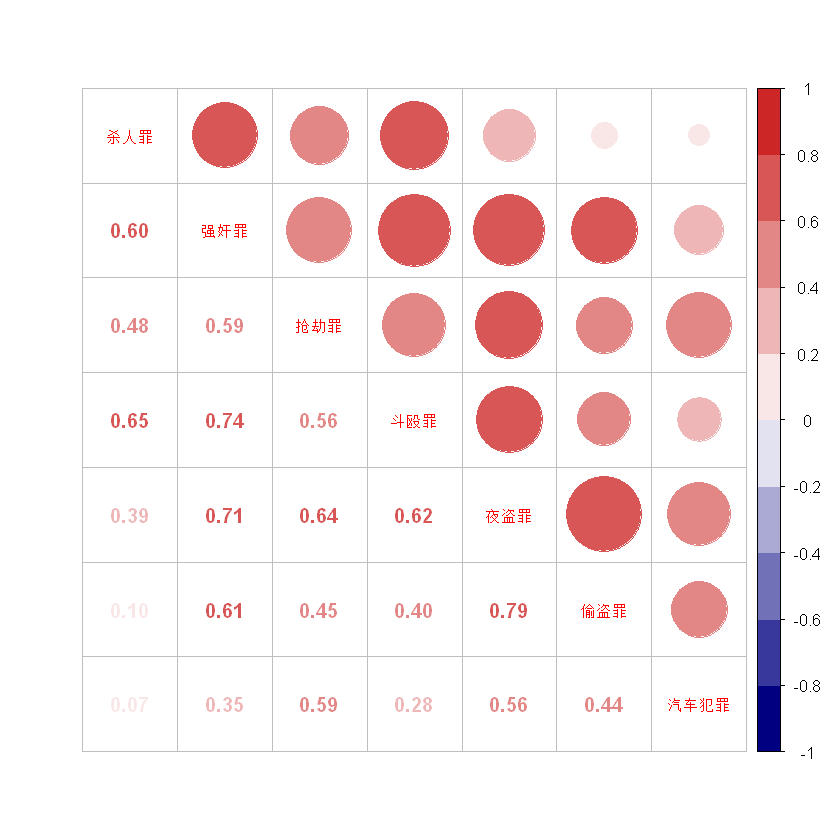

In [1]:
# 读入数据
data = read.table('.//AMSA_data//《应用多元统计分析》（第6版）文本数据（以逗号为间隔）//exec7.6.csv',header = TRUE,sep = ',')
colnames(data) = c('地区','杀人罪','强奸罪','抢劫罪','斗殴罪','夜盗罪','偷盗罪','汽车犯罪')
# 绘制热力图
library("corrplot")
b = cor(as.matrix(data[,-1])) # 相关系数矩阵
col = colorRampPalette(c("navy", "white", "firebrick3"))
corrplot(b,type = "upper",col = col(10),tl.pos = "d",tl.cex = 0.75) 
corrplot(b,add = TRUE, type = "lower", method = "number",diag = FALSE,tl.pos = "n", cl.pos = "n",col = col(10))

通过观察变量之间的相关系数可知，许多变量之间确实都具有较强的相关性，其中夜盗罪犯罪比率和偷盗罪犯罪比率的相关性最强。从图中我们还可以得到更多的信息，红色代表变量之间的正相关关系，气泡的越大、颜色越深，表明两变量间的相关程度越大。

由于当各变量的单位不完全相同，或者变量的方差差异较大时，不宜采用从协方差矩阵出发的主成分分析法，因而需要观察变量的差异信息，以决定是否采用从相关矩阵出发的方法。

In [2]:
# 对各变量求方差
as.data.frame(apply(data[,-1],2,var))

,"apply(data[, -1], 2, var)"
,<dbl>
杀人罪,14.9519
强奸罪,115.7696
抢劫罪,7805.4693
斗殴罪,10050.6739
夜盗罪,187017.9416
偷盗罪,526943.4505
汽车犯罪,37401.4007


显然，不同变量方差之间差距非常大，因此为了结果的稳健性，我们采用从相关矩阵R出发的主成分分析法。从R出发求得的主成分具有十分简洁的性质。并且，R是未知的，我们需要通过样本进行估计。

设 $\lambda_1^* \geq \lambda_2^* \geq \cdots \geq \lambda_p^* \geq 0$ 为 $\mathrm{R}$ 的 $\mathrm{p}$ 个特征值, $t_1^*, t_2^*, \ldots, t_p^*$ 为相应的单位特征向量, 且相互正交, 则 $\mathrm{p}$ 个主成分为 $y_1^*=t_1^{* \prime} x^*, y_2^*=$ $t_2^{* \prime} x^*, \ldots, y_p^*=t_p^{* \prime} x^*$ 。记 $y^*=\left(y_1^*, y_2^*, \ldots, y_p^*\right)^{\prime}, T^*=\left(t_1^*, t_2^*, \ldots, t_p^*\right)=\left(t_{i k}^*\right)$, 于是主成分的定义是：
$$y^*=T^{* \prime} x^*$$

主成分 $y_1^*, y_2^*, \ldots, y_m^*$ 对变量 $x_i^*$ 的贡献率为：
$$
\rho_{i \cdot 1, \ldots, m}^2=\sum_{k=1}^m \rho^2\left(x_i^*, y_k^*\right)=\sum_{k=1}^m \lambda_k^* t_{i k}^{* 2}
$$
累计贡献率为：
$$
\sum_{i=1}^m \rho_{i \cdot 1, \ldots, m}^2
$$

第一主成分的贡献率最大，表明它解释原始变量的能力最强，而之后的几个主成分的解释能力依次递减。而累计贡献率则表明从1到m个主成分共同解释原始变量的能力。通常我们取一个较小的m，使累计贡献率达到较高的百分比（85%~95%）。

In [3]:
pc = eigen(b) # b是相关系数矩阵
lam = pc$values
prop = lam/sum(lam)
cumprop = cumsum(prop)
lpc = data.frame(特征值 = lam,贡献率 = prop,累计贡献率 = cumprop)
round(lpc,3)

特征值,贡献率,累计贡献率
<dbl>,<dbl>,<dbl>
4.115,0.588,0.588
1.239,0.177,0.765
0.726,0.104,0.868
0.316,0.045,0.914
0.258,0.037,0.951
0.222,0.032,0.982
0.124,0.018,1.000


观察主成分的贡献率，当取m=3时，累计贡献率达到了86.8%，这说明使用前三个主成分已经可以基本满足我们的要求。

此外，碎石图是一个能帮助我们确定主成分个数的视觉工具。

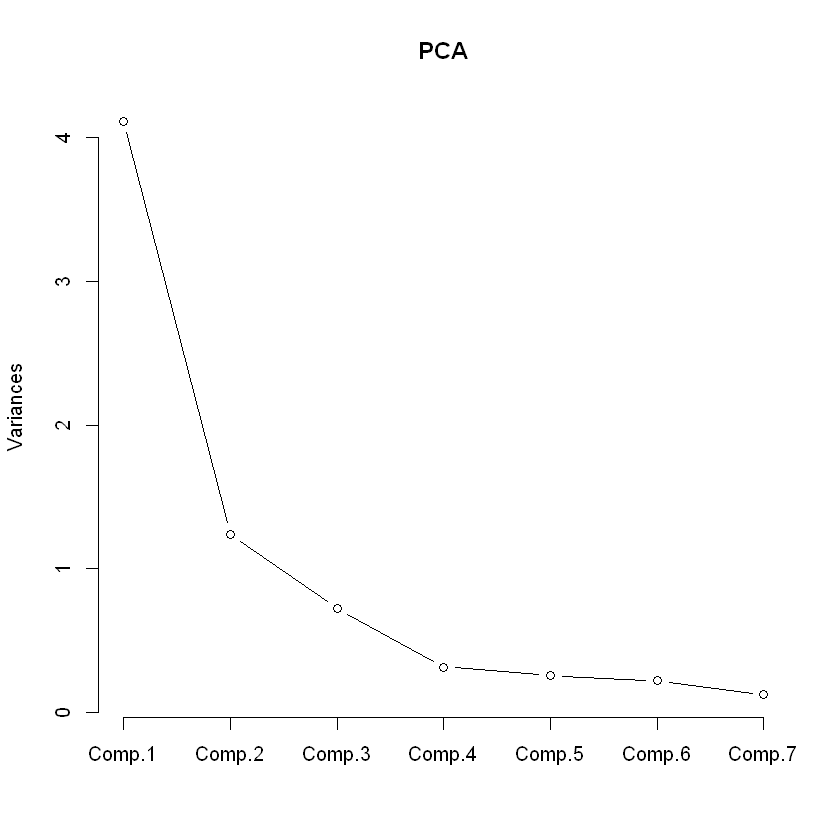

In [4]:
# 碎石图
PCA = princomp(data[,-1],cor=TRUE) # 从相关矩阵出发，默认从协方差矩阵出发
screeplot(PCA,type = 'line') 

可以看到，从第四个主成分起，线段开始变得平坦，意味着从$\lambda_4$起特征值的变化开始明显变小，因此我们有理由倾向于取前面三个主成分。

根据前面的分析，累计贡献率可以度量 $m$ 主成分 $y_1, y_2, \ldots, y_m$ 从原始变量 $x_1, x_2, \ldots, x_p$ 中提取信息的多少，而为了度量 $y_1, y_2, \ldots, y_m$ 包含有 $x_i(\mathrm{i}=1,2, \ldots, \mathrm{p})$ 的信息量, 我们可以使用 $x_i$ 与 $y_1, y_2, \ldots, y_m$ 的复相关系数的平方 $\rho_{i \cdot 1, \ldots, m}^2$ 这个指标。

为了计算复相关系数，我们需要计算主成分得分：

若将各观测值 $x_j$ 代替上式中的观测值向量 $\mathrm{x}$, 则第 $\mathrm{i}$ 主成分的值
$$
\hat{y_{ji}}=\hat{t}_l^{\prime} x_j, i=1,2, \ldots, p
$$
称之为观测值 $x_j$ 的第 $\mathrm{i}$ 主成分得分。

复相关系数的平方是 $x_i$ 的方差可由 $y_1, y_2, \ldots, y_m$ 联 合解释的比例，称之为 $\mathrm{m}$ 个主成分 $y_1, y_2, \ldots, y_m$ 对原始变量 $x_i$ 的贡献率:
$$
\rho_{i \cdot 1, \ldots, m}^2=\sum_{k=1}^m \rho^2\left(x_i, y_k\right)=\sum_{k=1}^m \frac{\lambda_k t_{i k}^2}{\sigma_{i i}}
$$

并且, $y_1, y_2, \ldots, y_p$ 对 $x_i$ 的贡献率 $\rho_{i \cdot 1, \ldots, p}^2=1$

再定义 $\rho\left(y_m, x_i\right)$ 为 $y_m$ 对 $x_i$ 的贡献率，反映一个主成分对一个原始变量的解释程度。

In [19]:
# 计算主成分对原始变量的贡献率
# 主成分得分
scores = round(PCA$scores[,c(1,2,3)],3)
rownames(scores) = data[,1] # 添加行名

p = c() # y对于x的贡献率
p2 = c() #（y,y,…）对与x的贡献率
for (m in 1:7){
    ps2 = c()
    ps = c()
    for (i in 2:8){
        gx = 0
        for (k in 1:m){gx = gx+(cor(data[i],PCA$scores[,k]))^2}
        ps2 = c(ps2,gx)
        gxsingle = cor(data[i],PCA$scores[,m])
        ps = c(ps,gxsingle)
    }
    p2 = cbind(p2,ps2)
    p = cbind(p,ps)
}

p2 = data.frame(p2,row.names = c('杀人罪','强奸罪','抢劫罪','斗殴罪','夜盗罪','偷盗罪','汽车犯罪'))
colnames(p2) = c('前1个主成分','前2个主成分','前3个主成分','前4个主成分','前5个主成分','前6个主成分','前7个主成分')
p2

p = data.frame(p,row.names = c('杀人罪','强奸罪','抢劫罪','斗殴罪','夜盗罪','偷盗罪','汽车犯罪'))
colnames(p) = c('第1个主成分','第2个主成分','第3个主成分','第4个主成分','第5个主成分','第6个主成分','第7个主成分')
p

,前1个主成分,前2个主成分,前3个主成分,前4个主成分,前5个主成分,前6个主成分,前7个主成分
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
杀人罪,0.3710359,0.8613969,0.8844571,0.9015055,0.9762088,0.9911169,1
强奸罪,0.7670949,0.8026564,0.8459387,0.8471635,0.8563271,0.9890950,1
抢劫罪,0.6481479,0.6503588,0.8288211,0.9273429,0.9970930,0.9999981,1
斗殴罪,0.6474172,0.7936007,0.7971076,0.9226215,0.9888424,0.9954390,1
夜盗罪,0.7972255,0.8484435,0.8804200,0.8814682,0.8841015,0.9478895,1
偷盗罪,0.5255043,0.7260047,0.9370508,0.9545094,0.9547431,0.9550879,1
汽车犯罪,0.3585337,0.6712203,0.9057027,0.9613190,0.9965886,0.9973176,1


,第1个主成分,第2个主成分,第3个主成分,第4个主成分,第5个主成分,第6个主成分,第7个主成分
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
杀人罪,0.6091272,0.70025782,0.15185585,0.13056951,0.27331898,0.12209858,0.094250434
强奸罪,0.8758395,0.18857770,-0.20804381,-0.03499774,0.09572650,-0.36437336,-0.104426905
抢劫罪,0.8050763,-0.04701999,0.42244803,0.31388175,-0.26410240,-0.05389934,-0.001374586
斗殴罪,0.8046224,0.38233955,-0.05921872,-0.35427944,-0.25733424,0.08121925,0.067535496
夜盗罪,0.8928749,-0.22631376,-0.17881986,0.03237596,0.05131603,0.25256285,-0.228277155
偷盗罪,0.7249168,-0.44777266,-0.45939753,0.13213094,0.01528742,0.01856874,0.211924812
汽车犯罪,0.5987769,-0.55918385,0.48423379,-0.23583117,0.18780202,-0.02699926,0.051792034


可见，前两个主成分对抢劫罪和汽车犯罪这两个原始变量的解释率都比较低，并且第二个主成分对抢劫罪变量的贡献率几乎为零，这说明 $y_1$和$y_2$中包含较少的关于这两个变量的信息，只取前面两个主成分会导致对原始变量的解释程度不够高。再取 $y_3$，此时（$y_1$,$y_2$,$y_3$）对每个变量$x_i$的贡献率都比较高，最小为79.7%，最大为93.7%，平均在85%左右，大致符合我们的要求。而如果使用更多的主成分，会导致降维的效果大打折扣，并且难以进行可视化分析。

使用前三个主成分已经可以基本满足我们的要求，但是这三个主成分必须都能得到成功的解释。因此，我们需要再考察主成分的公式:
$$
y_k=t_{1 k} x_1+t_{2 k} x_2+\cdots+t_{p k} x_p,    k=1,2, \ldots, p .
$$
称 $t_{i k}$ 为第 $\mathrm{k}$ 主成分 $y_k$ 在第 $\mathrm{i}$ 个原始变量 $x_i$ 上的载荷，它反映了 $x_i$ 对 $y_k$ 的重要程度。

In [22]:
# 特征向量打印
comp = pc$vectors
rownames(comp) = c('杀人罪','强奸罪','抢劫罪','斗殴罪','夜盗罪','偷盗罪','汽车犯罪') # 添加行名
colnames(comp) = paste('主成分',1:length(lam),sep='') # 添加列名
round(comp,3)

,主成分1,主成分2,主成分3,主成分4,主成分5,主成分6,主成分7
杀人罪,-0.300,0.629,0.178,-0.232,0.538,-0.259,0.268
强奸罪,-0.432,0.169,-0.244,0.062,0.188,0.773,-0.296
抢劫罪,-0.397,-0.042,0.496,-0.558,-0.520,0.114,-0.004
斗殴罪,-0.397,0.344,-0.070,0.630,-0.507,-0.172,0.192
夜盗罪,-0.440,-0.203,-0.210,-0.058,0.101,-0.536,-0.648
偷盗罪,-0.357,-0.402,-0.539,-0.235,0.030,-0.039,0.602
汽车犯罪,-0.295,-0.502,0.568,0.419,0.370,0.057,0.147


因此得到主成分向量分别为（只列举前三个，后面的以此类推）：

$y_1=-0.3 x_1-0.432 x_2-0.397 x_3-0.397 x_4-0.44 x_5-0.357 x_6-0.295 x_7$

$y_2=0.629 x_1+0.169 x_2-0.042 x_3+0.344 x_4-0.203 x_5-0.402 x_6-0.502 x_7$ 

$y_3=0.178 x_1-0.244 x_2+0.496 x_3-0.07 x_4-0.21 x_5-0.539 x_6+0.568 x_7$



第一主成分$y_1$对所有标准化变量都有近似相等的负载荷，大的$y_1$值意味着各种罪名的犯罪概率普遍倾向于有较小的值，即社会整体稳定安全；反之，小的$y_1$值意味着各种罪名的犯罪概率普遍倾向于有较大的值，即社会整体治安动荡。因此，我们称第一主成分为**社会综合治理成分**。

第二主成分$y_2$在杀人罪、斗殴罪概率指标上有较大的正载荷，在汽车犯罪、偷盗罪上有较大的负载荷，而在其余变量上载荷都较小。$y_2$的值大时说明杀人罪、斗殴罪概率大，而汽车犯罪、偷盗罪概率小。这里我们认定汽车犯罪为在汽车交通运输中发生的严重危害交通运输安全的行为，包括酒后驾驶等。相对于汽车犯罪、偷盗罪，杀人罪、斗殴罪带来的社会影响更大，犯罪情节更严重，故可称第二主成分为**情节恶劣犯罪成分**。

第三主成分$y_3$在汽车犯罪上有较大的正载荷，在偷盗罪上有较大的负载荷，而在其余变量上载荷都较小。$y_3$的值大时说明汽车犯罪概率大，而偷盗罪概率小。由于汽车交通犯罪主要是指超速驾驶、无证驾驶、醉酒驾驶等，这些已经成为一个一般性和日常性的犯罪类型，而偷盗罪概率小能在一定程度上说明社会经济稳定，失业率较低。因此，可称第三主成分为**社会常规稳定成分**。

进一步，为了研究七个原始变量间是否存在多重共线性，我们观察到最末一个主成分的特征值为0.124，非常小，所以我们认为变量存在这样的一个多重共线性关系：

$0.2675928 x_1-0.29648548 x_2-0.003902681 x_3+0.19174459 x_4-0.64811708 x_5+0.60169004 x_6+0.14704626 x_7 \approx 0$.

最后为了根据不同成分对不同城市进行粗略的划分层次，我们可以根据不同的主成分进行城市排序。

In [62]:
head(scores[order(scores[,1]),]) # 按第一主成分排序 

,Comp.1,Comp.2,Comp.3
North Dakota,-4.004,-0.392,-0.087
South Dakota,-3.204,0.257,-0.140
West Virginia,-3.180,0.823,0.542
Iowa,-2.608,-0.833,-0.521
Wisconsin,-2.528,-0.789,-0.431
New Hampshire,-2.491,-0.833,-0.212


In [38]:
head(scores[order(scores[,2]),]) # 按第二主成分排序 

,Comp.1,Comp.2,Comp.3
Massachusetts,0.988,-2.658,2.568
Rhode Island,-0.204,-2.168,0.967
Hawaii,0.831,-1.842,-0.790
Connecticut,-0.547,-1.516,0.792
Delaware,0.974,-1.310,-0.531
Minnesota,-1.570,-1.067,-0.148


In [39]:
head(scores[order(scores[,3]),]) # 按第三主成分排序 

,Comp.1,Comp.2,Comp.3
Arizona,3.045,-0.854,-1.770
Washington,0.940,-0.745,-1.317
Oregon,1.464,-0.592,-1.258
Florida,3.143,0.610,-1.228
Colorado,2.535,-0.926,-1.163
New Mexico,1.226,0.960,-1.084


按三种主成分进行升序排序可以看到，各个排行榜均存在差异。按照我们此前对各个成分的解释，North Dakota州社会治理最不稳定，Massachusetts州发生严重犯罪最少，Arizona州经济发展较差，社会并不稳定。

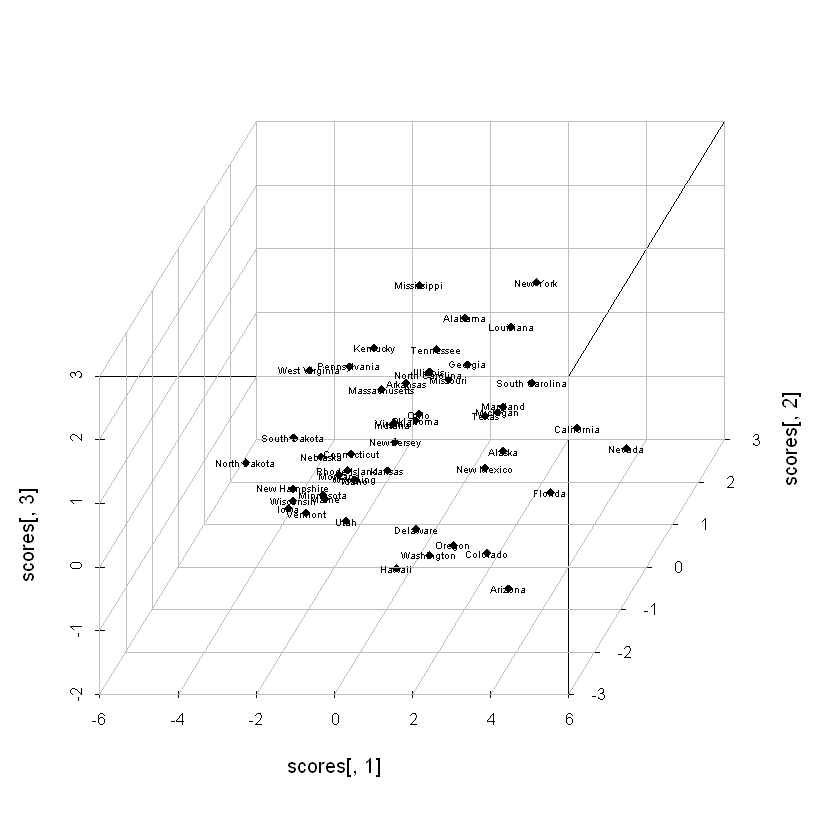

In [41]:
# 可视化结果
library("scatterplot3d")
source('http://www.sthda.com/sthda/RDoc/functions/addgrids3d.r')
s3d = scatterplot3d(scores[,1],scores[,2],scores[,3],pch = 18,grid=TRUE,angle = 60) # 散点图
addgrids3d(scores[,1],scores[,2],scores[,3], grid = c("xy", "xz", "yz"),angle = 60)
text(s3d$xyz.convert(scores[,1],scores[,2],scores[,3]), labels = data$地区,cex= 0.5, col = "black")

为了能对结果进行直观的呈现，我们绘制三维散点图。根据绘图结果，显然第二主成分值越大，第一、三主成分值越小，说明社会很不稳定，犯罪情节严重。因此看到，North Dakota州和South Dakota州的治安是较为混乱的，但是由于使用的数据较为过时，这与目前的情况实际上并不完全吻合。